In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# ingest the data
data_set = pd.read_csv('airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"])

# add the column moy (i.e., month of year) to use later on to compute the seasonal component
data_set['moy'] = data_set["Month"].dt.month 

# set the index
data_set.set_index("Month")

,Thousands of Passengers,moy
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1960-08-01,606,8
1960-09-01,508,9
1960-10-01,461,10


In [4]:
# compute the centred moving average and the moving average
data_set['centred-MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=True).mean()
data_set['MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=False).mean()

<AxesSubplot:>

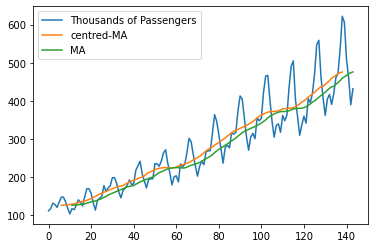

In [5]:
# visualize the original data and the two moving averages
data_set[["Thousands of Passengers","centred-MA","MA"]].plot()

In [6]:
data_set['detrended'] = data_set['Thousands of Passengers']-data_set['centred-MA']

<AxesSubplot:>

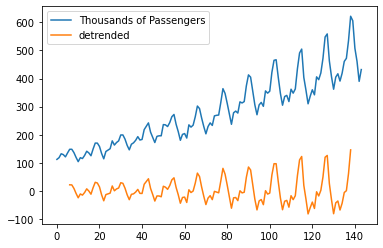

In [7]:
data_set[["Thousands of Passengers","detrended"]].plot()

In [8]:
from statsmodels.tsa.stattools import adfuller, kpss

df = data_set['detrended'].dropna()

# ADF Test
# where the null hypothesis is the time series possesses a unit root and is non-stationary. 
# So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis. )

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.219821202784966
p-value: 0.0006098038156792091
Critical Values:
   1%, -3.4865346059036564
Critical Values:
   5%, -2.8861509858476264
Critical Values:
   10%, -2.579896092790057


<AxesSubplot:xlabel='moy'>

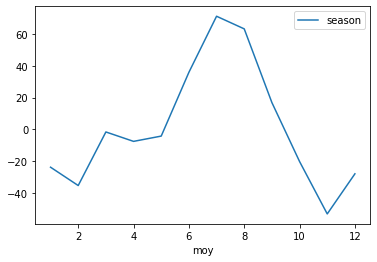

In [26]:
subsequence = data_set[["detrended","moy"]].groupby(["moy"]).mean()
subsequence.rename(columns={"detrended": "season"},inplace=True)
subsequence.plot()

In [27]:
mean = subsequence.mean()
mean

season    1.139257
dtype: float64

In [32]:
subsequence["season"] = subsequence["season"]-float(mean)

In [33]:
subsequence.mean()

season    2.072416e-15
dtype: float64

In [39]:
seasonal_component = subsequence
for i in range(0,11):
    seasonal_component = pd.concat([seasonal_component,subsequence])
seasonal_component = seasonal_component.reset_index()

<AxesSubplot:>

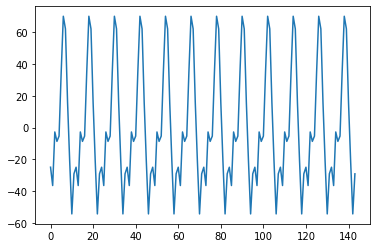

In [40]:
seasonal_component["season"].plot()

In [51]:
data_set['deseasoned'] = pd.DataFrame(data_set['detrended'].values - seasonal_component["season"].values)

<AxesSubplot:>

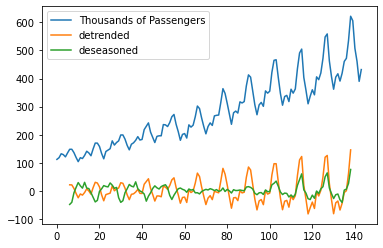

In [53]:
data_set[["Thousands of Passengers","detrended",'deseasoned']].plot()

In [49]:
df = df2.dropna()

# ADF Test
# where the null hypothesis is the time series possesses a unit root and is non-stationary. 
# So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis. )

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.823310888966774
p-value: 4.9068363987711064e-05
Critical Values:
   1%, -3.4865346059036564
Critical Values:
   5%, -2.8861509858476264
Critical Values:
   10%, -2.579896092790057


In [37]:
seasonal_component = None